In [50]:
import jieba
import jieba.posseg as posseg
import numpy as np
import torch
from wordcloud import WordCloud
import os
import json
from matplotlib import pyplot as plt
import nltk
from nltk.book import FreqDist

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
posseg.lcut('健行天下：带上一本健康的书去出行')

[pair('健行', 'v'),
 pair('天下', 's'),
 pair('：', 'x'),
 pair('带上', 'v'),
 pair('一本', 'm'),
 pair('健康', 'a'),
 pair('的', 'uj'),
 pair('书', 'n'),
 pair('去', 'v'),
 pair('出行', 'v')]

In [25]:
posseg.lcut('机器学习')

[pair('机器', 'n'), pair('学习', 'v')]

In [ ]:
jieba.lcut('自然语言处理')

In [22]:
for w, p in posseg.lcut('健行天下：带上一本健康的书去出行'):
    print(w, p)

健行 v
天下 s
： x
带上 v
一本 m
健康 a
的 uj
书 n
去 v
出行 v


In [9]:
max_len = 10
seq_len = [3,4,5]
np.tile(np.arange(max_len), (len(seq_len), 1))


array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [12]:
torch.tensor(seq_len).reshape(-1, 1)

tensor([[3],
        [4],
        [5]])

In [14]:
np.tile(np.arange(max_len), (len(seq_len), 1)) < np.array(seq_len).reshape(-1, 1)

array([[ True,  True,  True, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False]])

In [21]:
batch_size = 3
seq_len = torch.tensor(seq_len)
torch.arange(max_len).expand(batch_size, -1).to(seq_len).lt(seq_len.unsqueeze(1))

/home/chenzhongyu/anaconda3/envs/snn/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor([[ True,  True,  True, False, False, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False, False, False]])

In [26]:
source_path = "./data"
train_source = "train_data.json"
dev_source = "dev_data.json"
test_source = "test1_data_postag.json"

In [27]:
def get_schemas(path):
    schemas = {}
    with open(os.path.join(path, "all_50_schemas"), 'rb') as f:
        for i, line in enumerate(f):
            spo = json.loads(line)
            schemas[spo['subject_type'] + spo['predicate'] + spo['object_type']] = i
    return schemas

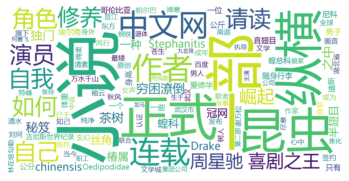

In [49]:
def get_data(path, name):
    texts = []
    with open(os.path.join(path, name), 'rb') as f:
        for i, line in enumerate(f):
            dic = json.loads(line)
            for t, _ in posseg.lcut(dic['text']):
                texts.append(t)
    return texts
            
texts = get_data(source_path, train_source)
wordcloud_fig = WordCloud(background_color="white",font_path="msyh.ttf", width=1600, height=800).generate(' '.join(texts))
# plt.imshow(nterpolation="bilinear")
plt.imshow(wordcloud_img, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_fig.to_file('wordcloud.jpg')

In [51]:
def get_data(path, name):
    spo_count = []
    with open(os.path.join(path, name), 'rb') as f:
        for i, line in enumerate(f):
            dic = json.loads(line)
            for spo in dic['spo_list']:
                spo_count.append(spo['subject_type'] + spo['predicate'] + spo['object_type'])
    return spo_count
            
spo_count = get_data(source_path, train_source)


In [52]:
spo_fdist = FreqDist(spo_count)

In [53]:
spo_fdist.most_common()

[('影视作品主演人物', 59893),
 ('图书作品作者人物', 33853),
 ('歌曲歌手人物', 25605),
 ('人物出生日期Date', 23290),
 ('影视作品导演人物', 22007),
 ('人物出生地地点', 19813),
 ('书籍出版社出版社', 17709),
 ('网络小说连载网站网站', 12877),
 ('人物国籍国家', 12261),
 ('人物毕业院校学校', 11515),
 ('人物民族Text', 11453),
 ('歌曲所属专辑音乐专辑', 10402),
 ('生物目目', 10342),
 ('歌曲作曲人物', 9607),
 ('企业成立日期Date', 9107),
 ('歌曲作词人物', 9046),
 ('影视作品编剧人物', 6667),
 ('影视作品出品公司企业', 6419),
 ('人物妻子人物', 5462),
 ('人物丈夫人物', 5462),
 ('人物父亲人物', 4701),
 ('机构成立日期Date', 3799),
 ('影视作品上映时间Date', 3522),
 ('人物母亲人物', 3516),
 ('历史人物朝代Text', 3433),
 ('人物身高Number', 2905),
 ('历史人物字Text', 2733),
 ('企业总部地点地点', 2466),
 ('历史人物号Text', 1551),
 ('电视综艺主持人人物', 1511),
 ('人物祖籍地点', 1492),
 ('电视综艺嘉宾人物', 1368),
 ('影视作品制片人人物', 1160),
 ('机构简称Text', 1008),
 ('行政区气候气候', 920),
 ('行政区面积Number', 660),
 ('企业创始人人物', 633),
 ('景点所在城市城市', 575),
 ('影视作品改编自作品', 553),
 ('机构占地面积Number', 502),
 ('行政区人口数量Number', 409),
 ('国家首都城市', 397),
 ('企业注册资本Number', 397),
 ('地点海拔Number', 383),
 ('企业董事长人物', 368),
 ('网络小说主角人物', 250),
 ('国家官方语言语言', 145)

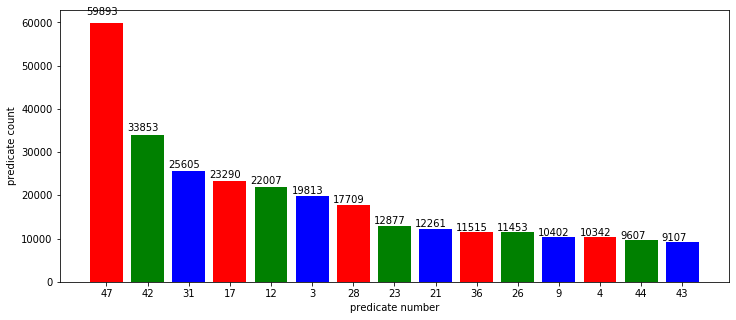

In [73]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.5, 1.03*height, '%s' % int(height))

plt.rcParams['font.family']=['NotoSansCJK']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12,5))

name_list = [name for (name, cnt) in fdist[:15]]
num_list = [cnt for (name, cnt) in fdist[:15]]
autolabel(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))
plt.ylabel('predicate count')
plt.xlabel('predicate number')
# plt.xticks(rotation=90)
plt.show()

In [68]:
schemas = get_schemas(source_path)
schemas

{'人物祖籍地点': 0,
 '人物父亲人物': 1,
 '企业总部地点地点': 2,
 '人物出生地地点': 3,
 '生物目目': 4,
 '行政区面积Number': 5,
 '机构简称Text': 6,
 '影视作品上映时间Date': 7,
 '人物妻子人物': 8,
 '歌曲所属专辑音乐专辑': 9,
 '企业注册资本Number': 10,
 '国家首都城市': 11,
 '影视作品导演人物': 12,
 '历史人物字Text': 13,
 '人物身高Number': 14,
 '影视作品出品公司企业': 15,
 '学科专业修业年限Number': 16,
 '人物出生日期Date': 17,
 '影视作品制片人人物': 18,
 '人物母亲人物': 19,
 '影视作品编剧人物': 20,
 '人物国籍国家': 21,
 '地点海拔Number': 22,
 '网络小说连载网站网站': 23,
 '人物丈夫人物': 24,
 '历史人物朝代Text': 25,
 '人物民族Text': 26,
 '历史人物号Text': 27,
 '书籍出版社出版社': 28,
 '电视综艺主持人人物': 29,
 '学科专业专业代码Text': 30,
 '歌曲歌手人物': 31,
 '歌曲作词人物': 32,
 '网络小说主角人物': 33,
 '企业董事长人物': 34,
 '机构成立日期Date': 35,
 '人物毕业院校学校': 36,
 '机构占地面积Number': 37,
 '国家官方语言语言': 38,
 '行政区邮政编码Text': 39,
 '行政区人口数量Number': 40,
 '景点所在城市城市': 41,
 '图书作品作者人物': 42,
 '企业成立日期Date': 43,
 '歌曲作曲人物': 44,
 '行政区气候气候': 45,
 '电视综艺嘉宾人物': 46,
 '影视作品主演人物': 47,
 '影视作品改编自作品': 48,
 '企业创始人人物': 49}

In [69]:
fdist = []
for name, count in spo_fdist.most_common():
    fdist.append((schemas[name], count))

In [70]:
fdist

[(47, 59893),
 (42, 33853),
 (31, 25605),
 (17, 23290),
 (12, 22007),
 (3, 19813),
 (28, 17709),
 (23, 12877),
 (21, 12261),
 (36, 11515),
 (26, 11453),
 (9, 10402),
 (4, 10342),
 (44, 9607),
 (43, 9107),
 (32, 9046),
 (20, 6667),
 (15, 6419),
 (8, 5462),
 (24, 5462),
 (1, 4701),
 (35, 3799),
 (7, 3522),
 (19, 3516),
 (25, 3433),
 (14, 2905),
 (13, 2733),
 (2, 2466),
 (27, 1551),
 (29, 1511),
 (0, 1492),
 (46, 1368),
 (18, 1160),
 (6, 1008),
 (45, 920),
 (5, 660),
 (49, 633),
 (41, 575),
 (48, 553),
 (37, 502),
 (40, 409),
 (11, 397),
 (10, 397),
 (22, 383),
 (34, 368),
 (33, 250),
 (38, 145),
 (30, 26),
 (39, 25),
 (16, 20)]

In [74]:
def get_data(path, name):
    words = []
    with open(os.path.join(path, name), 'rb') as f:
        for i, line in enumerate(f):
            dic = json.loads(line)
            words += list(dic['text'])
    return set(words)
            
len(get_data(source_path, train_source))

8180

In [75]:
def get_data(path, name):
    words = []
    with open(os.path.join(path, name), 'rb') as f:
        for i, line in enumerate(f):
            dic = json.loads(line)
            for w, _ in posseg.lcut(dic['text']):
                words.append(w)
    return set(words)
            
len(get_data(source_path, train_source))

246045